# Working with complicated dataset

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

csv_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# List of column names to use as the header row.
column_names = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", 
                "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]

# Skips all comment lines, creates a header for the dataframe, sets the column "subject acc.ver" as the index, and specifies thousands separator.
blast_results = pd.read_csv(csv_file,
                            na_values=['-'],
                            skiprows=7,
                            names=column_names,
                            usecols=column_names,
                            index_col="subject acc.ver",
                            thousands=",")
blast_results.drop("query acc.ver", axis=1, inplace=True) # Drops the 1st column "query acc.ver".
blast_results.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0


### Question 2
What is the average number of publications?

In [7]:
blast_results.publications.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [8]:
blast_results.reset_index(inplace=True) # Resets the dataframe index.
blast_results[blast_results["bonds"] > 15000]["subject acc.ver"].to_list() # Lists subject acc.ver that has over 15000 bonds.

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

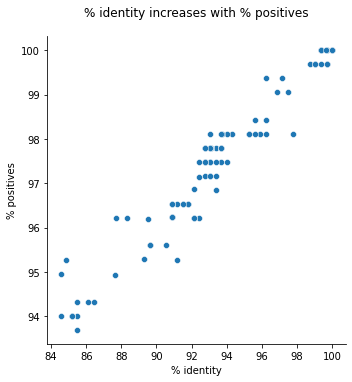

In [9]:
# Creates a relational plot to show the correlation between % identity and % positives.
sns.relplot(data=blast_results, x="% identity", y="% positives")
plt.title("% identity increases with % positives", pad=20);

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [10]:
csv_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_sources = pd.read_csv(csv_file)

# Merges data when "subject acc.ver" column from blast_results dataframe equals "Protein" column from protein_sources dataframe.
# Avoids duplicates in "Protein" column for protein_sources dataframe.
# Entries without a matching protein will have NA as their Protein source.
merged = blast_results.merge(protein_sources.drop_duplicates(subset=["Protein"]),
                             left_on="subject acc.ver",
                             right_on="Protein",
                             how="left")
merged.drop(["Unnamed: 0", "Protein"], axis=1, inplace=True)
merged.rename(columns={"Source": "Protein source"}, inplace=True)
merged

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN
96,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN
97,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
98,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,GenPept
